# TRABAJO PRÁCTICO DE TRADUCCIÓN DIRIGIDA POR SINTAXIS

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/mfidabel/tp_compiladores/blob/main/TP%20Compiladores.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Correr en Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/mfidabel/tp_compiladores/blob/main/TP%20Compiladores.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />Ver Código Fuente en GitHub</a></td>
</table>

**Diseño de Compiladores**

Integrantes:

- Mateo Fidabel

# Objetivo del Trabajo Práctico

Resolver un problema construyendo un TDS aprovechando la generación directa y simple del código fuente. Identificar el lenguaje de entrada así como el de salida y aplicar las técnicas vistas en clase.

# Problema

**Implementar la función de concatenación, que recibe como sintáxis de entrada *concat($\text{string}_A$, $n_1$, $\text{string}_B$, $n_2$)* y retorna una lista con los primeros *$n_1$* caracteres de *$\text{string}_A$* concatenados con los *$n_2$* caracteres del *$\text{string}_B$*.**

# Resolución

## 1. Notación BNF

Encontrar una notación BNF que permita describir el lenguaje de entrada y a su vez, el problema.

### a. Escribir el BNF que acepta la gramática de entrada

**MAIN** $\rightarrow$ **CONCAT** **PAR_IZQ** **PARAMS** **PAR_DER**

**PARAMS** $\rightarrow$  **ARGUMENTO** **COMA** **ARGUMENTO**

**ARGUMENTO** $\rightarrow$ **LITERAL** **COMA** **NÚMERO**

**NÚMERO** $\rightarrow$ **DIGITO** **R**

**LITERAL** $\rightarrow$ **CARACTER** **R'**

**R** $\rightarrow$ **NÚMERO** | $\epsilon$

**R'** $\rightarrow$ **LITERAL** | $\epsilon$

**CONCAT** $\rightarrow$ concat

**PAR_IZQ** $\rightarrow$ (

**PAR_DER** $\rightarrow$ )

**COMA** $\rightarrow$ ,

**DIGITO** $\rightarrow$ 0 | 1 | $...$ | 9

**CARACTER** $\rightarrow$ a | b | $...$ | z | A | B | $...$ | Z

### b. Validar rapidamente que la gramática acepte la entrada

Construir el árbol sintáctico para la entrada **concat(ArB, 3, A, 12)**

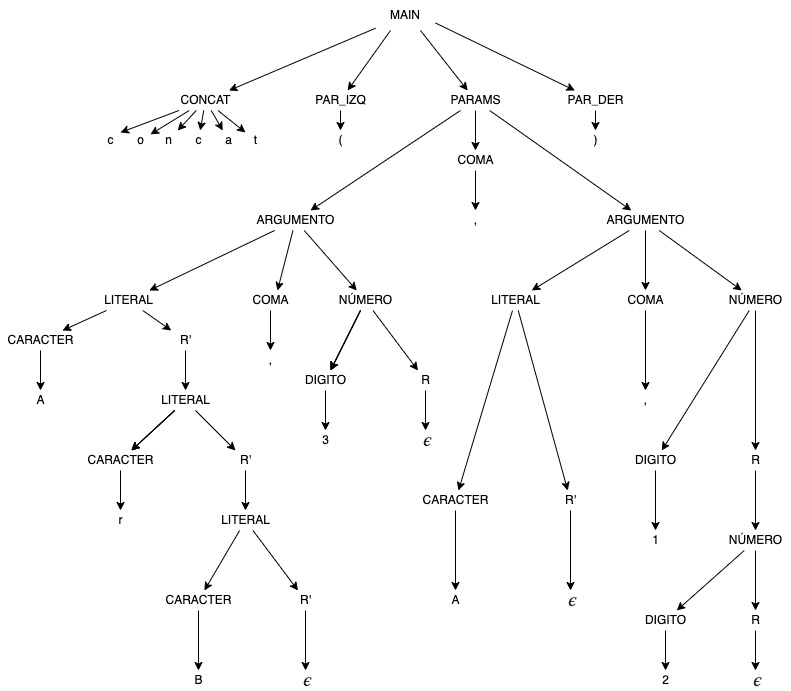

Notar que no tiene sentido tomar los primeros 12 carácteres de **A** y que se debe retornar un mensaje de error. Sin embargo, esta validación no forma parte del análisis léxico ni del análisis sintáctico, sino del análisis semántico. De igual forma se incluye en la entrada para validar rápidamente si la gramática acepta números con más de un dígito teniendo en cuenta que sintacticamente sigue siendo válido la cadena.

## 2. Reglas semánticas

Definir las reglas o acciones semánticas que corresponden para generar el lenguaje de salida pretendido. Se recomienda utilizar el árbol sintáctico como herramienta para comprender como se aplican las reglas o acciones semánticas, y si corresponden tanto para la entrada como para la salida.

| BNF                                                                     	| REGLAS SEMÁNTICAS                                                                                	|
|-------------------------------------------------------------------------	|--------------------------------------------------------------------------------------------------	|
| **MAIN** $\rightarrow$ **CONCAT** **PAR_IZQ** **PARAMS** **PAR_DER**    	| **MAIN**.x = **PARAMS**.x                                                                        	|
| **PARAMS** $\rightarrow$  **ARGUMENTO** **COMA** **ARGUMENTO**          	| **PARAMS**.x = **ARGUMENTO_1**.x $\cup$ **ARGUMENTO_2**.x                                        	|
| **ARGUMENTO** $\rightarrow$ **LITERAL** **COMA** **NÚMERO**             	| **ARGUMENTO**.x = **LITERAL**.x[:**NUMERO**.val]                                                 	|
| **NÚMERO** $\rightarrow$ **DIGITO** **R**                               	| **NUMERO**.val = **DIGITO**.x * (10 ^ **R**.exp) + **R**.val, <br>**NUMERO**.exp = **R**.exp + 1 	|
| **LITERAL** $\rightarrow$ **CARACTER** **R'**                           	| **LITERAL**.x = [**CARACTER**.x, **(R'.x)] <br>// Append por la Izquierda                        	|
| **R** $\rightarrow$ **NÚMERO**                                          	| **R**.val = **NUMERO**.val, <br>**R**.exp = **NUMERO**.exp                                       	|
| **R** $\rightarrow$ $\epsilon$                                          	| **R**.val = 0, <br>**R**.exp = 0                                                                 	|
| **R'** $\rightarrow$ **LITERAL**                                        	| **R'**.x = **LITERAL**.x                                                                         	|
| **R'** $\rightarrow$ $\epsilon$                                         	| **R'**.x = " " <br><br>// CADENA VACIA                                                            	|
| **CONCAT** $\rightarrow$ concat                                         	| // NO OP                                                                                         	|
| **PAR_IZQ** $\rightarrow$ (                                             	| // NO OP                                                                                         	|
| **PAR_DER** $\rightarrow$ )                                             	| // NO OP                                                                                         	|
| **COMA** $\rightarrow$ ,                                                	| // NO OP                                                                                         	|
| **DIGITO** $\rightarrow$ 0 \| 1 \| $...$ \| 9                           	| **DIGITO**.x = 0 \| 1 \| $...$ \| 9                                                              	|
| **CARACTER** $\rightarrow$ a \| b \| $...$ \| z \| A \| B \| $...$ \| Z 	| **CARACTER**.x = 'a' \| 'b' \| $...$ \| 'Z'                                                      	|

## 3. Gramática Predictiva

Evaluar si la gramática planteada es predictiva y en caso contrario, convertirla en un equivalente predictiva.

### a. Verificar la existencia de la recursión por la izquierda.

Afortunadamente la gramática no presenta ninguna producción con la forma $A \rightarrow A \alpha | \beta $, por lo que **no hay recursión por la izquierda**.

### b. Verificar la existencia de ambigüedad sintáctica.

No existe ninguna ambigüedad en la selección de producciones en la gramática

### c. Verificar la existencia de ambigüedad semántica

Como la ambigüedad semántica ocurre cuando el conjunto generado por aplicar *PRIMERO* a los lados derechos de una producción compuesta no son disjuntos, primero debemos hallar los conjuntos primero.

*   P(**MAIN**) = P(**CONCAT**) = { c }
*   P(**PARAMS**) = P(**ARGUMENTO**) = P(**LITERAL**) = P(**CARACTER**) = { a, b, $...$, Z}
*   P(**ARGUMENTO**) = P(**LITERAL**) = P(**CARACTER**) = { a, b, $...$, Z}
*   P(**NÚMERO**) = P(**DÍGITO**) = {0, 1, $...$, 9 }
*   P(**LITERAL**) = P(**CARACTER**) = { a, b, $...$, Z}
*   P(**R**) = P(**NÚMERO**) $\cup$ P($\epsilon$) = {0, 1, $...$, 9 } $\cup$ { $\epsilon$ }
*   P(**R'**) = P(**LITERAL**) $\cup$ P($\epsilon$) = { a, b, $...$, Z} $\cup$ { $\epsilon$ }
*   P(**CONCAT**) = { c }
*   P(**PAR_IZQ**) = { ( }
*   P(**PAR_DER**) = { ) }
*   P(**COMA**) = { , }


No se encontró ambigüedad semántica, por ende, la gramática es predictiva

### d. Ejemplos de Árboles Sintácticos

#### i. Una cadena de entrada válida

Construir el árbol sintáctico para la entrada **concat(ArB, 3, A, 12)**

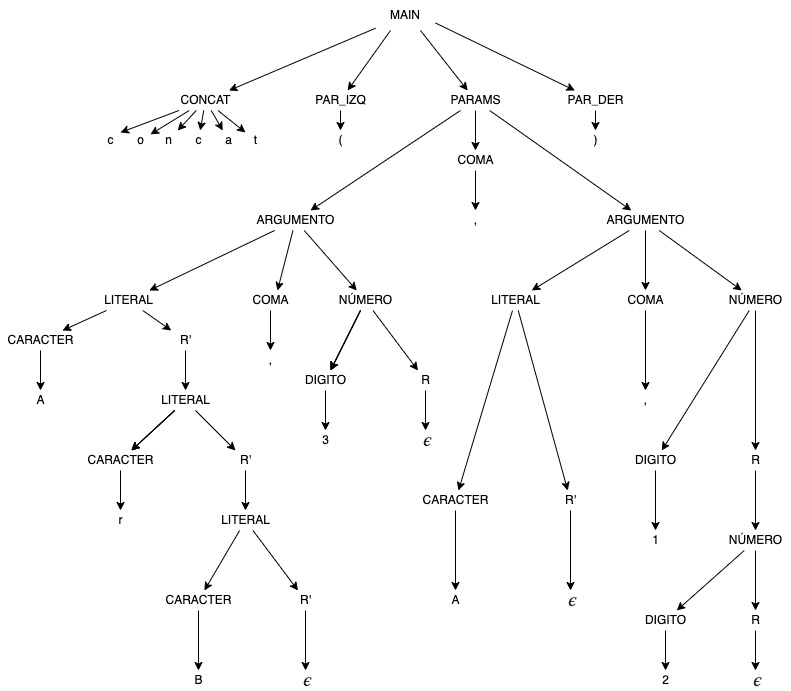

#### ii. Una cadena de entrada invalida o no aceptada por el TDS

Construir el árbol sintáctico para la entrada **concat(, 3, A, 12)**

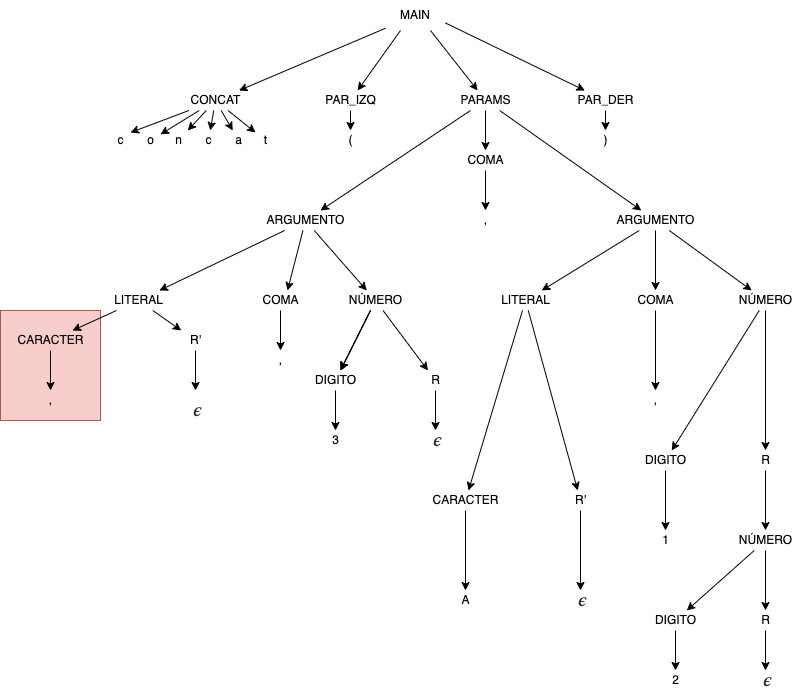

## 4. Código Fuente

Escribir el código fuente del TDS a partir de su representación predictiva, utilizando el esquema que implementa una función para cada no terminal

### Funciones de apoyo

Algunas excepciones para manejar errores

In [1]:
class ErrorCompilacion(Exception):
  pass

class ErrorMatch(ErrorCompilacion):
  def __init__(self, esperado: str, obtenido: str):
    self.esperado = esperado
    self.obtenido = obtenido
    super()\
      .__init__(f"Se esperaba '{self.esperado}' pero se obtuvo {self.obtenido}")

  def __str__(self):
    return f"Se esperaba '{self.esperado}' pero se obtuvo {self.obtenido}."

class ErrorBufferVacio(ErrorCompilacion):
  def __init__(self, esperado: str):
    self.esperado = esperado
    super()\
      .__init__(f"Se esperaba '{self.esperado}' pero "\
                "la cadena ya se terminó de leer")

  def __str__(self):
    return f"Se esperaba '{self.esperado}' pero "\
            "la cadena ya se terminó de leer"

class ErrorProduccionNoEncontrada(ErrorCompilacion):
  def __init__(self, terminal: str, regla: str):
    self.terminal = terminal
    self.regla = regla
    super().__init__(f"No se pudo encontrar una producción"\
                     f" adecuada para '{self.terminal}'")

  def __str__(self):
    return f"No se pudo encontrar una producción adecuada "\
           f"para '{self.terminal}' en la regla {self.regla}"

class ErrorSemanticoLongitud(ErrorCompilacion):
  def __init__(self, cadena: str, longitud: int):
    self.cadena = cadena
    self.longitud = longitud
    super()\
      .__init__(f"Se piden los primeros {self.longitud} caracteres, "\
      f"sin embargo, '{self.cadena}' solo posee {len(self.cadena)} caracteres")

  def __str__(self):
    return f"Se piden los primeros {self.longitud} caracteres, sin embargo,"\
           f" '{self.cadena}' solo posee {len(self.cadena)} caracteres"


Creamos una clase **Buffer** para simular la lectura de la cadena

In [2]:
class Buffer():
  def __init__(self, entrada: str):
    self.entrada = entrada
    self.puntero = 0
    # Saltamos los espacios
    while self.entrada[self.puntero] == " " and \
          self.puntero < len(self.entrada):
      self.puntero = self.puntero + 1

  def avanzar_puntero(self):
    self.puntero = self.puntero + 1
    while self.actual == " " and self.puntero < len(self.entrada):
      self.puntero = self.puntero + 1

  def match(self, terminal: str):
    if self.completo():
      # Ya leyó todo, no puede matchear más
      raise ErrorBufferVacio(terminal)

    if self.actual == terminal:
      # Pasar a la siguiente letra despues de los espacios
      self.avanzar_puntero()
    else:
      # Arrojar Error de Compilación
      raise ErrorMatch(esperado = terminal,
                       obtenido = self.actual)

  @property
  def actual(self):
    return self.entrada[self.puntero] if not self.completo() else '\0'

  def completo(self):
    return self.puntero == len(self.entrada)

# CLASES
RANGO_CARACTERES = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 
                    'l', 'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u',
                    'v', 'w', 'x', 'y', 'z', 
                    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                    'L', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
                    'V', 'W', 'X', 'Y', 'Z'] 

RANGO_DIGITOS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

### MAIN

**MAIN** $\rightarrow$ **CONCAT** **PAR_IZQ** **PARAMS** **PAR_DER**

**MAIN**.x = **PARAMS**.x

In [3]:
def MAIN():
  global buffer
  
  CONCAT()
  PAR_IZQ()
  x = PARAMS()
  PAR_DER()
  return x

### PARAMS

**PARAMS** $\rightarrow$  **ARGUMENTO** **COMA** **ARGUMENTO**

**PARAMS**.x = **ARGUMENTO_1**.x $\cup$ **ARGUMENTO_2**.x

In [4]:
def PARAMS():
  global buffer

  x_1 = ARGUMENTO()
  COMA()
  x_2 = ARGUMENTO()
  return x_1 + x_2 # Concatenacion

### ARGUMENTO

**ARGUMENTO** $\rightarrow$ **LITERAL** **COMA** **NÚMERO**

**ARGUMENTO**.x = **LITERAL**.x[:**NUMERO**.val] 

In [5]:
def ARGUMENTO():
  global buffer

  literal = LITERAL()
  COMA()
  val, exp = NUMERO()

  # Regla semantica: Debe tener longitud igual o menos que la palabra
  if val > len(literal):
    raise ErrorSemanticoLongitud(literal, val)
    
  return literal[:val] 

### NÚMERO

**NÚMERO** $\rightarrow$ **DIGITO** **R**

**NUMERO**.val = **DIGITO**.x * (10 ^ **R**.exp) + **R**.val, <br>**NUMERO**.exp = **R**.exp + 1

In [6]:
def NUMERO():
  global buffer
  
  x = DIGITO()
  val, exp = R()
  return x * (10 ** exp) + val, exp + 1

### LITERAL

**LITERAL** $\rightarrow$ **CARACTER** **R'**

**LITERAL**.x = concat(**CARACTER**.x, **R'**.x) <br>// Append por la Izquierda

In [7]:
def LITERAL():
  global buffer
  
  caracter = CARACTER()
  resto = R_prima()
  return caracter + resto # Concatenacion

### R

**R** $\rightarrow$ **NÚMERO**

**R**.val = **NUMERO**.val, <br>**R**.exp = **NUMERO**.exp   

**R** $\rightarrow$  $\epsilon$

**R**.val = 0, <br>**R**.exp = 0 

In [8]:
def R():
  global buffer
  
  entrada = buffer.actual
  if entrada in RANGO_DIGITOS:
    return NUMERO()
  else:
    # Vacio
    return 0, 0
    

### R'

**R'** $\rightarrow$ **LITERAL**

**R'**.x = **LITERAL**.x 

**R'** $\rightarrow$ $\epsilon$

**R'**.x = " " <br><br>// CADENA VACIA

In [9]:
def R_prima():
  global buffer

  entrada = buffer.actual
  if entrada in RANGO_CARACTERES:
    return LITERAL()
  else:
    # Vacío
    return ""

### CONCAT, PAR_IZQ, PAR_DER, COMA

**CONCAT** $\rightarrow$ concat

**PAR_IZQ** $\rightarrow$ (

**PAR_DER** $\rightarrow$ )

**COMA** $\rightarrow$ ,

In [10]:
def CONCAT() -> None:
  global buffer
  
  buffer.match("c")
  buffer.match("o")
  buffer.match("n")
  buffer.match("c")
  buffer.match("a")
  buffer.match("t")

def PAR_IZQ() -> None:
  global buffer
  
  buffer.match("(")

def PAR_DER() -> None:
  global buffer
  
  buffer.match(")")

def COMA() -> None:
  global buffer
  
  buffer.match(",")

### DIGITO

**DIGITO** $\rightarrow$ 0 | 1 | $...$ | 9

**DIGITO**.x = 0 \| 1 \| $...$ \| 9       

In [11]:
def DIGITO():
  global buffer
  
  entrada = buffer.actual
  if entrada == '0':
    buffer.match('0')
    return 0
  elif entrada == '1':
    buffer.match('1')
    return 1
  elif entrada == '2':
    buffer.match('2')
    return 2
  elif entrada == '3':
    buffer.match('3')
    return 3
  elif entrada == '4':
    buffer.match('4')
    return 4
  elif entrada == '5':
    buffer.match('5')
    return 5
  elif entrada == '6':
    buffer.match('6')
    return 6
  elif entrada == '7':
    buffer.match('7')
    return 7
  elif entrada == '8':
    buffer.match('8')
    return 8
  elif entrada == '9':
    buffer.match('9')
    return 9
  else:
    raise ErrorProduccionNoEncontrada(entrada, "DIGITO")

### CARACTER

**CARACTER** $\rightarrow$ a | b | $...$ | z | A | B | $...$ | Z

**CARACTER**.x = 'a' \| 'b' \| $...$ \| 'Z'   

In [12]:
def CARACTER():
  global buffer
  
  entrada = buffer.actual
  if entrada in RANGO_CARACTERES:
    # Clase de las Letras
    buffer.match(entrada)
    # Se retorna el mismo caracter, por ende, no es necesario buscar el valor
    return entrada
  else:
    raise ErrorProduccionNoEncontrada(entrada, "CARACTER")

## 5. Pruebas

In [13]:
def TRADUCIR(entrada: str = "concat(stringA, 3, stringB, 2)") -> str:
  global buffer

  buffer = Buffer(entrada)

  return MAIN()

Probamos con una cadena válida

In [14]:
TRADUCIR("concat(stringA, 2, stringB, 3)")

'ststr'

Ahora con una cadena cuya longitud es menor al número que se solicita en alguno de los parámetros

In [15]:
TRADUCIR("concat(stringA, 9, stringB, 4)")

ErrorSemanticoLongitud: ignored

También se debe detectar cadenas que no pertenecen al lenguaje

In [16]:
TRADUCIR("conct(stringA, 3, stringB, 4)")

ErrorMatch: ignored

O cadenas donde no se encuentra la derivación correspondiente

In [17]:
TRADUCIR("concat(012string, 3, stingB, 4) ")

ErrorProduccionNoEncontrada: ignored